In [156]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
#importing the datasets
train_df= pd.read_csv('/home/francis/Downloads/train (5).csv')
test_df=pd.read_csv('/home/francis/Downloads/test (1).csv')

In [158]:
# previewing the train dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
#previewing the test dataset
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [160]:
#checking the shape of the datasets

#train dataset
print('The train dataset has',train_df.shape[0],'rows and ',train_df.shape[1],'columns.')

#test dataset
print('The test dataset has',test_df.shape[0],'rows and ',test_df.shape[1],'columns.')

The train dataset has 891 rows and  12 columns.
The test dataset has 418 rows and  11 columns.


In [161]:
# checking the details of the train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [162]:
# checking the details of the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [163]:
# checking for null values in the train dataset in percentages
train_df.isnull().sum()* 100/ len(train_df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

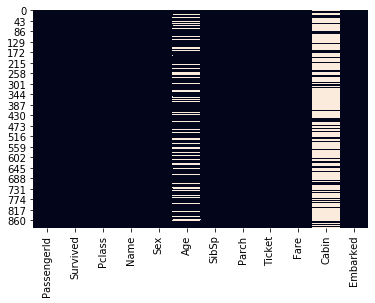

In [164]:
#plotting the null values
sns.heatmap(train_df.isnull(),cbar=False)

The cabin has the largest number of null values. above 70%. therefore we will drop this column for this section.
For the age column, we will replace the nulls with the average age.

In [165]:
# dropping the Cabin column
train_df.drop(['Cabin'],axis=1,inplace=True)

In [166]:
# replacing the nulls in the age column
train_df.fillna(train_df['Age'].mean(),inplace=True)

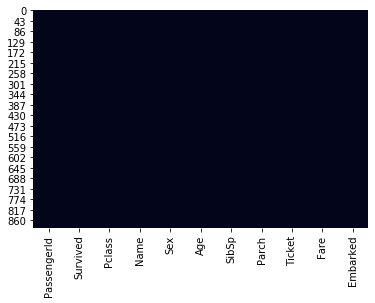

In [167]:
#plotting the null values
sns.heatmap(train_df.isnull(),cbar=False)
#we have cleared all the null values for the train dataset.

In [168]:
#checking for null values and matching the test dataset.
test_df.isnull().sum()/len(test_df)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

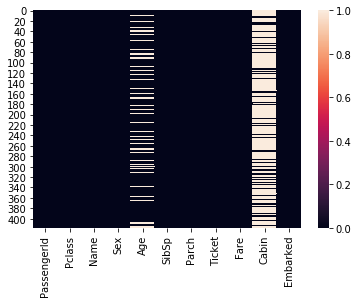

In [169]:
# Plotting the null values
sns.heatmap(test_df.isnull())

We will drop the Cabin column and replace the nulls with the average age in the age column.

In [170]:
# dropping the cabin column 
test_df.drop(['Cabin'],axis=1,inplace=True)

In [171]:
#replacing the null age 
test_df.fillna(test_df['Age'].mean(),inplace=True)

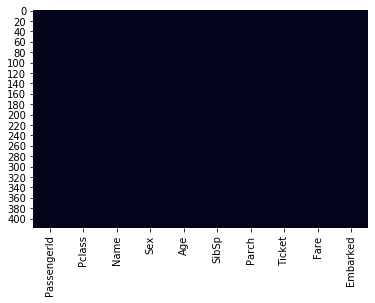

In [172]:
# Plotting to check the null values
sns.heatmap(test_df.isnull(),cbar=False)

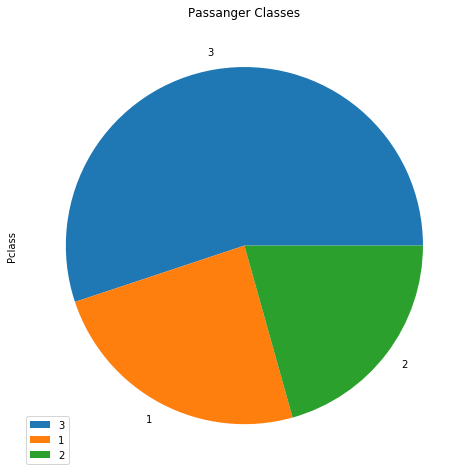

In [173]:
# checking the distibution of passenger class
train_df.Pclass.value_counts().plot(kind='pie',figsize=(8,9))
plt.title('Passanger Classes')
plt.legend()

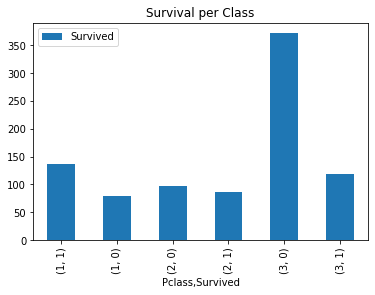

In [174]:
#plotting to see survival in terms of class
links=train_df.groupby(['Pclass'])['Survived'].value_counts()
links.plot(kind='bar',title='Survival per Class')
plt.legend()

# the larfest number that survived was from the 1 class followed closely by the 3rd. however,
# the 3rd class had the highest deaths.

In [175]:
#plotting the regression plots
sns.pairplot(train_df, kind = "reg",corner=True)

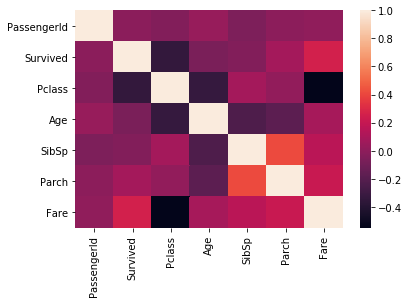

In [ ]:
#plotting the correlation
sns.heatmap(train_df.corr())

## KNN classification

In [155]:
#splitting the train and test data
#importting the train test split
from sklearn.model_selection import train_test_split
X=train_df([['Pclass','SibSp','Parch']])
y=train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=25)

TypeError: 'DataFrame' object is not callable

In [146]:
# checking the shape of the train test
X_train.shape,y_train.shape

((623, 9), (623,))

In [147]:
#checking the datatypes
X_train.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [148]:
#training the model
# importing the library
from sklearn.neighbors import KNeighborsRegressor

#training
knn=KNeighborsRegressor(11)
knn.fit(X_train,y_train)

ValueError: could not convert string to float: 'male'